<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/IAI2_2%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリの読み込み

次のセルは実行しても何も起こりませんが、最初に1度必ず実行してください。2度実行する必要はありません。

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import numpy as np
import matplotlib.pyplot as plt
!pip -q install japanize-matplotlib
import japanize_matplotlib 

# 階層的クラスタリングの例

データ 1,2,4,5,9,12,14,15 を最短距離を基準として階層的クラスタリングし、デンドログラムを描画するプログラムは次のように書ける。

Text(0.5, -0.3, '図1 階層的クラスタリングの例')

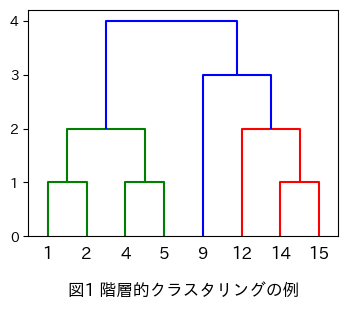

In [15]:
ラベル=[1,2,4,5,9,12,14,15]
データ=[[1],[2],[4],[5],[9],[12],[14],[15]]
距離行列 = pdist(データ)
距離基準 = 'single' # 最短距離
階層的クラスタリング結果 = linkage(距離行列,method=距離基準) 
plt.figure(num=None, figsize=(4, 3), dpi=100)
デンドログラム = dendrogram(階層的クラスタリング結果,labels=ラベル,truncate_mode='lastp')
plt.title("図1 階層的クラスタリングの例", y=-0.3)

# 解説
## 距離行列の算出  (3行目)

`  　距離行列 = pdist(データ)`



データのすべての組み合わせについて求めた距離を並べた行列を計算しています。  
どんな行列なのか、表示してみます。

In [16]:
# 距離行列
print(距離行列)
print(squareform(距離行列))

[ 1.  3.  4.  8. 11. 13. 14.  2.  3.  7. 10. 12. 13.  1.  5.  8. 10. 11.
  4.  7.  9. 10.  3.  5.  6.  2.  3.  1.]
[[ 0.  1.  3.  4.  8. 11. 13. 14.]
 [ 1.  0.  2.  3.  7. 10. 12. 13.]
 [ 3.  2.  0.  1.  5.  8. 10. 11.]
 [ 4.  3.  1.  0.  4.  7.  9. 10.]
 [ 8.  7.  5.  4.  0.  3.  5.  6.]
 [11. 10.  8.  7.  3.  0.  2.  3.]
 [13. 12. 10.  9.  5.  2.  0.  1.]
 [14. 13. 11. 10.  6.  3.  1.  0.]]


## 階層的クラスタリングの実行
```距離基準 = 'single' # 最短距離```   
```階層的クラスタリング結果 = linkage(距離行列,method=距離基準)```



In [29]:
pd = linkage(D,method='single') # 最短距離
pd

array([[ 0.,  1.,  1.,  2.],
       [ 2.,  3.,  1.,  2.],
       [ 6.,  7.,  1.,  2.],
       [ 8.,  9.,  2.,  4.],
       [ 5., 10.,  2.,  3.],
       [ 4., 12.,  3.,  4.],
       [11., 13.,  4.,  8.]])

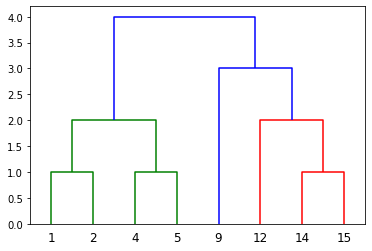

In [ ]:
pd = linkage(D,method='single') # 最短距離
dendro = dendrogram(pd,labels=labels,truncate_mode='lastp')

In [ ]:
pd = linkage(D,method='') # 最短距離
dendro = dendrogram(pd,labels=labels,truncate_mode='lastp')

In [ ]:
X = np.array([x for x in set(np.round(100*np.random.rand(100)).astype('int'))])
X = X[:8]
X

array([ 1,  2,  3,  5,  6, 12, 14, 15])